In [1]:
# Prediction of 'unit_price_range' column with the explicative features 
# ['gender', 'weekday', 'is_morning','product_group', 'line_item_amount']

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import math as m
import scipy.stats as stats

In [3]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\DATASETS\mid_proyect')
data = pd.read_csv('coffee_refinal.csv')

In [4]:
#Remove duplicated in the DataFrame
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
data.shape

(280345, 39)

In [5]:
# Creating new column 'unit_price_range' splitting the prizes in 3 ranges

data.loc[(data.unit_price <= 2.5), 'unit_price_range'] = 1
data.loc[(data.unit_price < 10) & (data.unit_price > 2.5) , 'unit_price_range'] = 2
data.loc[(data.unit_price >= 10 ), 'unit_price_range'] = 3

#### unit_price_range = 1 --> LOW (<2.5 €)

#### unit_price_range = 2 --> MEDIUM ( 2.5 > 10 €)

#### unit_price_range = 3 --> HIGH (<10 €)

In [56]:
data['is_morning']= (data["transaction_time"] >= '05:00:00') & (data["transaction_time"] <= '12:00:00')

data["transaction_date"] = data["transaction_date"].apply(pd.to_datetime)

data["weekday"] = data["transaction_date"].dt.strftime('%w')
# %w	Day of the week where Sunday=0 and Saturday=6

data['is_cheap'] = (data["unit_price"] <= 3.5)

In [41]:
data.loc[(data.birth_year <= 1969), 'generation'] = 1
data.loc[(data.birth_year > 1969) & (data.birth_year < 1990 ) , 'generation'] = 2
data.loc[(data.birth_year >= 1990 ), 'generation'] = 3

#### generation = 1 --> OLD

#### generation = 2 --> ADULT

#### generation = 3 --> YOUNG

In [17]:
# Choosing features and dropping duplicates/NaNs. Maybe include 'instore_yn', 'product_group', 'new_product_yn', 'product_type'

X = data.loc[:, ['gender', 'weekday', 'is_morning',
             'product_group', 'line_item_amount', 'unit_price_range']]

#X.drop_duplicates(keep='first', inplace=True, ignore_index=False)

X.dropna(inplace=True)


y = X.loc[:,'unit_price_range']
X = X.loc[:,['gender', 'weekday', 'is_morning',
             'product_group', 'line_item_amount']]

In [18]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

print("Nb rows X_train = {}".format(len(X_train)))
print("Nb rows X_test = {}".format(len(X_test)))
print("Nb rows y_train = {}".format(len(y_train)))
print("Nb rows y_test = {}".format(len(y_test)))

Nb rows X_train = 97053
Nb rows X_test = 41595
Nb rows y_train = 97053
Nb rows y_test = 41595


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138648 entries, 0 to 280344
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            138648 non-null  object 
 1   weekday           138648 non-null  object 
 2   is_morning        138648 non-null  bool   
 3   product_group     138648 non-null  object 
 4   line_item_amount  138648 non-null  float64
dtypes: bool(1), float64(1), object(3)
memory usage: 5.4+ MB


In [20]:
# Encoding categorical features and standardizing numeric features

numeric_features = [4] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0, 1, 2, 3] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )


X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)


#Encoding target variable
#encoder = LabelEncoder()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.transform(y_test))

In [21]:
model1 = LogisticRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

In [22]:
def Log_Reg(model):

    model.fit(X_train, y_train)
        
    # Evaluation of the model
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
        
    print(classification_report(y_train, pred_train))
    print(classification_report(y_test, pred_test))
    
    # Visualize confusion matrices
    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
    plt.show()

    _ , ax = plt.subplots() # Get subplot from matplotlib
    ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn

In [23]:
def ran_for(model, forest):

    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    

In [24]:
def dec_tree(model, leaf):
    
    model.fit(X_train, y_train)
    
    # Evaluation of the model
    print("Train Score : {}".format(model.score(X_train, y_train)))
    print('Test Score : {}'.format(model.score(X_test, y_test)))
    
 

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.56      0.54      0.55      5476
         2.0       0.97      0.97      0.97     91361
         3.0       1.00      0.96      0.98       216

    accuracy                           0.95     97053
   macro avg       0.84      0.82      0.83     97053
weighted avg       0.95      0.95      0.95     97053

              precision    recall  f1-score   support

         1.0       0.55      0.55      0.55      2357
         2.0       0.97      0.97      0.97     39125
         3.0       0.99      0.92      0.95       113

    accuracy                           0.95     41595
   macro avg       0.84      0.81      0.83     41595
weighted avg       0.95      0.95      0.95     41595



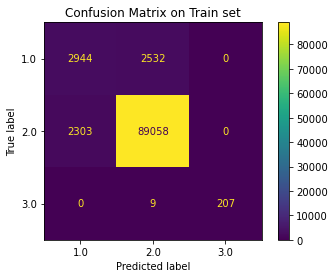

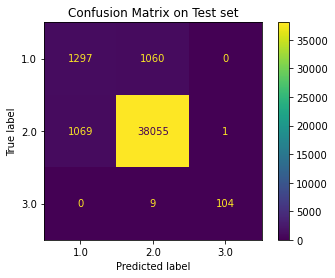

In [25]:
Log_Reg(model1)

In [26]:
#Random Forest
ran_for(model3, 200)

Train Score : 0.9688953819728974
Test Score : 0.9620566165662303


In [27]:
#Decision Tree
dec_tree(model2, 3)

Train Score : 0.9689235245455445
Test Score : 0.961989759610249


In [28]:
# First correction imbalance: oversampling 

# SMOTE method

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [31]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(97053, 18)
(274083, 18)


In [32]:
y_train.value_counts()/len(y_train)

2.0    0.941352
1.0    0.056423
3.0    0.002226
Name: unit_price_range, dtype: float64

In [33]:
y_train_SMOTE.value_counts()/len(y_train_SMOTE)

3.0    0.333333
2.0    0.333333
1.0    0.333333
Name: unit_price_range, dtype: float64

In [34]:
model = LogisticRegression()
model.fit(X_train_SMOTE, y_train_SMOTE)

pred_train_SMOTE = model.predict(X_train_SMOTE)
pred_test_SMOTE = model.predict(X_test)
print(classification_report(y_test, pred_test_SMOTE))
print(classification_report(y_train_SMOTE, pred_train_SMOTE))

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.41      1.00      0.58      2357
         2.0       1.00      0.91      0.95     39125
         3.0       0.77      1.00      0.87       113

    accuracy                           0.92     41595
   macro avg       0.73      0.97      0.80     41595
weighted avg       0.97      0.92      0.93     41595

              precision    recall  f1-score   support

         1.0       0.92      1.00      0.96     91361
         2.0       1.00      0.92      0.96     91361
         3.0       1.00      1.00      1.00     91361

    accuracy                           0.97    274083
   macro avg       0.97      0.97      0.97    274083
weighted avg       0.97      0.97      0.97    274083



In [35]:
# Confidence Intervals

In [36]:
mean = data.unit_price.mean()

std = data.unit_price.std()

n = len(data.unit_price)

 # t-statistics scipy stats
t =  stats.t.ppf(0.975, df = n-1) # 0.975 because Gaussian is symmetric and we need divide 0.05/2

error = t * std/(m.sqrt(n))

In [37]:
confidence_interval = [mean - error, mean + error ]
confidence_interval

[3.440511407308487, 3.4491083112533114]

# Visualizations

### unit_price_range

<AxesSubplot:xlabel='unit_price_range'>

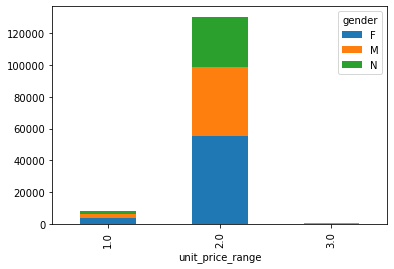

In [38]:
# by gender

open_ply_graf = data.groupby(['unit_price_range', 'gender']).size().reset_index().pivot(columns='gender', index='unit_price_range', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='unit_price_range'>

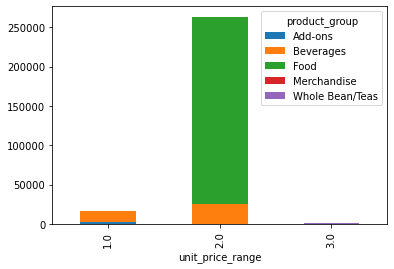

In [39]:
# by product_group

open_ply_graf = data.groupby(['unit_price_range', 'product_group']).size().reset_index().pivot(columns='product_group', index='unit_price_range', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='unit_price_range'>

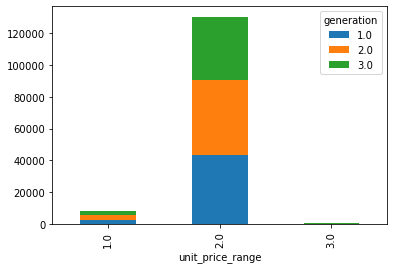

In [42]:
# by generation

open_ply_graf = data.groupby(['unit_price_range', 'generation']).size().reset_index().pivot(columns='generation', index='unit_price_range', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='unit_price_range'>

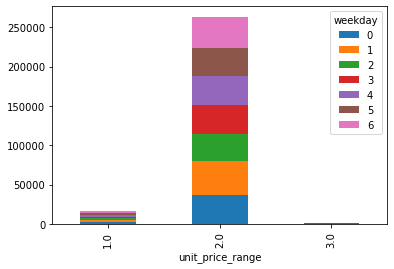

In [53]:
# by weekday

open_ply_graf = data.groupby(['unit_price_range', 'weekday']).size().reset_index().pivot(columns='weekday', index='unit_price_range', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='is_morning'>

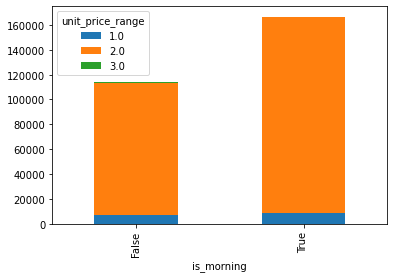

In [68]:
open_ply_graf = data.groupby(['unit_price_range', 'is_morning']).size().reset_index().pivot(columns='unit_price_range', index='is_morning', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

In [43]:
X.columns

Index(['gender', 'weekday', 'is_morning', 'product_group', 'line_item_amount'], dtype='object')

### is_cheap

<AxesSubplot:xlabel='gender'>

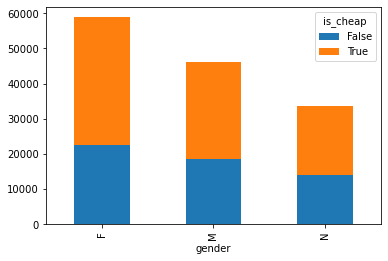

In [58]:
open_ply_graf = data.groupby(['is_cheap', 'gender']).size().reset_index().pivot(columns='is_cheap', index='gender', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='generation'>

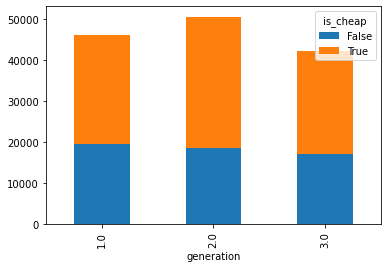

In [59]:
open_ply_graf = data.groupby(['is_cheap', 'generation']).size().reset_index().pivot(columns='is_cheap', index='generation', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='product_group'>

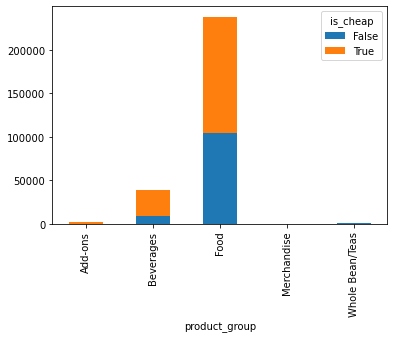

In [60]:
open_ply_graf = data.groupby(['is_cheap', 'product_group']).size().reset_index().pivot(columns='is_cheap', index='product_group', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='weekday'>

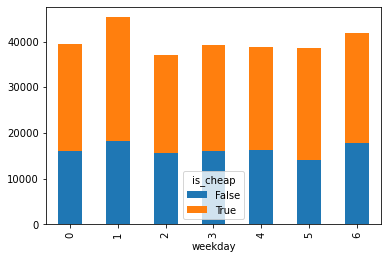

In [67]:
open_ply_graf = data.groupby(['is_cheap', 'weekday']).size().reset_index().pivot(columns='is_cheap', index='weekday', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='is_morning'>

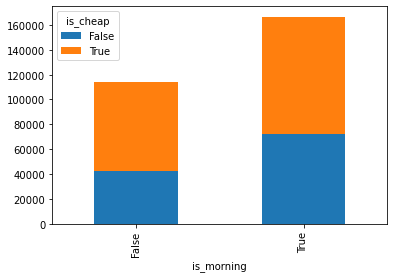

In [70]:
open_ply_graf = data.groupby(['is_cheap', 'is_morning']).size().reset_index().pivot(columns='is_cheap', index='is_morning', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

### product_group

<AxesSubplot:xlabel='is_morning'>

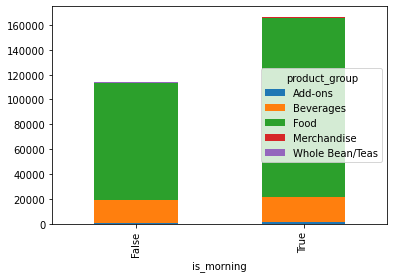

In [69]:
open_ply_graf = data.groupby(['product_group', 'is_morning']).size().reset_index().pivot(columns='product_group', index='is_morning', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='gender'>

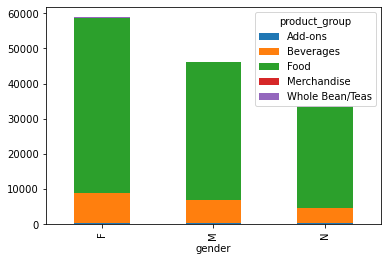

In [63]:
open_ply_graf = data.groupby(['product_group', 'gender']).size().reset_index().pivot(columns='product_group', index='gender', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='generation'>

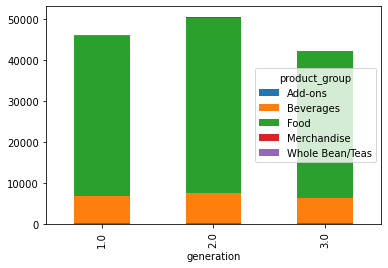

In [64]:
open_ply_graf = data.groupby(['product_group', 'generation']).size().reset_index().pivot(columns='product_group', index='generation', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='is_cheap'>

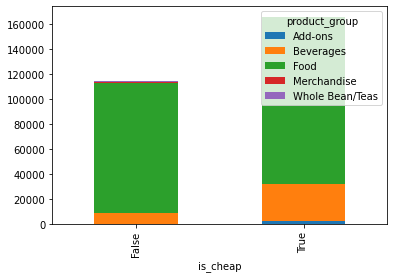

In [65]:
open_ply_graf = data.groupby(['product_group', 'is_cheap']).size().reset_index().pivot(columns='product_group', index='is_cheap', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='is_morning'>

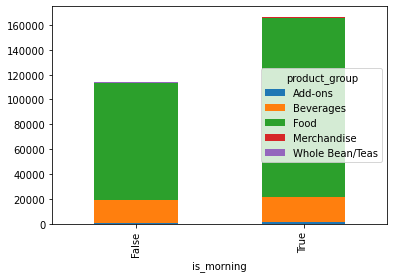

In [66]:
open_ply_graf = data.groupby(['product_group', 'is_morning']).size().reset_index().pivot(columns='product_group', index='is_morning', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

### generation

<AxesSubplot:xlabel='gender'>

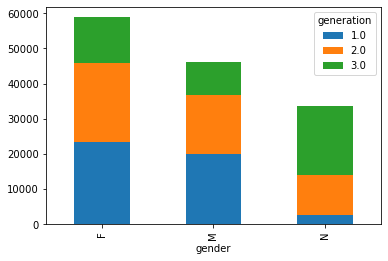

In [71]:
open_ply_graf = data.groupby(['generation', 'gender']).size().reset_index().pivot(columns='generation', index='gender', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='weekday'>

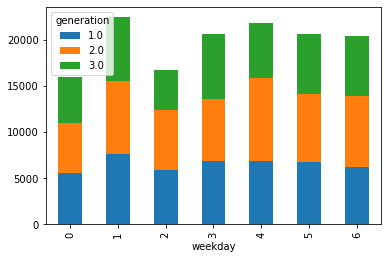

In [72]:
open_ply_graf = data.groupby(['generation', 'weekday']).size().reset_index().pivot(columns='generation', index='weekday', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='is_morning'>

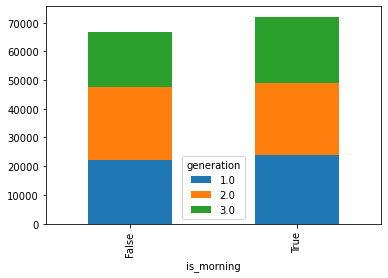

In [73]:
open_ply_graf = data.groupby(['generation', 'is_morning']).size().reset_index().pivot(columns='generation', index='is_morning', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='product_group'>

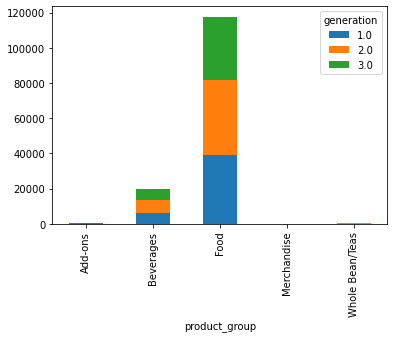

In [74]:
open_ply_graf = data.groupby(['generation', 'product_group']).size().reset_index().pivot(columns='generation', index='product_group', values=0)
open_ply_graf.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='unit_price_range'>

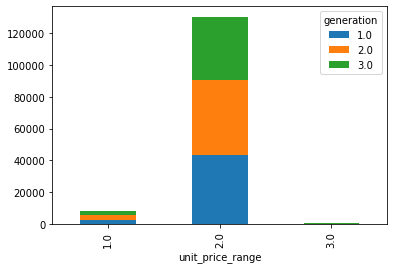

In [75]:
open_ply_graf = data.groupby(['generation', 'unit_price_range']).size().reset_index().pivot(columns='generation', index='unit_price_range', values=0)
open_ply_graf.plot(kind='bar', stacked=True)